<a href="https://colab.research.google.com/github/somkat16/DS-projects/blob/main/Runner_time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import tensorflow as tf

In [2]:
file_path = '/content/Track_Results.xlsx'
df_track = pd.read_excel(file_path, sheet_name='Sheet7')

df_track

,Name,Time (minutes),Event,Date,Time
0,"Appleton, Margo",00:04:11,ACC Outdoor Track & Field Championships,"May 15-17, 2025",4:11.00
1,"Appleton, Margo",00:04:16.320000,ACC Outdoor Track & Field Championships,"May 15-17, 2025",4:16.32
2,"Appleton, Margo",00:04:05.680000,Raleigh Relays,"Mar 27-29, 2025",4:05.68
3,"Appleton, Margo",00:04:28.310000,ACC Outdoor Track & Field Championships,"May 9-11, 2024",4:28.31
4,"Appleton, Margo",00:04:11.040000,ACC Outdoor Track & Field Championships,"May 9-11, 2024",4:11.04
...,...,...,...,...,...
282,"Parks, Taryn",00:04:24.530000,ACC Outdoor Track & Field Championships,"May 13-15, 2021",4:24.53
283,"Parks, Taryn",00:04:22.040000,Duke Twilight,2021-05-03 00:00:00,4:22.04
284,"Parks, Taryn",00:04:29.130000,Virginia Challenge,"Apr 16-17, 2021",4:29.13
285,"Parks, Taryn",DNF,Eagle Elite Invitational,2025-02-14 00:00:00,DNF


In [3]:
del df_track['Time (minutes)']

In [4]:
df_track

,Name,Event,Date,Time
0,"Appleton, Margo",ACC Outdoor Track & Field Championships,"May 15-17, 2025",4:11.00
1,"Appleton, Margo",ACC Outdoor Track & Field Championships,"May 15-17, 2025",4:16.32
2,"Appleton, Margo",Raleigh Relays,"Mar 27-29, 2025",4:05.68
3,"Appleton, Margo",ACC Outdoor Track & Field Championships,"May 9-11, 2024",4:28.31
4,"Appleton, Margo",ACC Outdoor Track & Field Championships,"May 9-11, 2024",4:11.04
...,...,...,...,...
282,"Parks, Taryn",ACC Outdoor Track & Field Championships,"May 13-15, 2021",4:24.53
283,"Parks, Taryn",Duke Twilight,2021-05-03 00:00:00,4:22.04
284,"Parks, Taryn",Virginia Challenge,"Apr 16-17, 2021",4:29.13
285,"Parks, Taryn",Eagle Elite Invitational,2025-02-14 00:00:00,DNF


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



converting time to seconds, because the time format is in a string which models can't use to regress or compare on. It has to be converted to a float in order for the models to use the numbers/times.

In [6]:
def conversion_time(time_str):
    try:
        minutes, seconds = map(float, time_str.split(':'))
        return minutes * 60 + seconds
    except:
        return np.nan

df_track['Time_seconds'] = df_track['Time '].astype(str).apply(conversion_time)
df_clean = df_track.dropna(subset=['Time_seconds'])


In [7]:
df_track

,Name,Event,Date,Time,Time_seconds
0,"Appleton, Margo",ACC Outdoor Track & Field Championships,"May 15-17, 2025",4:11.00,251.00
1,"Appleton, Margo",ACC Outdoor Track & Field Championships,"May 15-17, 2025",4:16.32,256.32
2,"Appleton, Margo",Raleigh Relays,"Mar 27-29, 2025",4:05.68,245.68
3,"Appleton, Margo",ACC Outdoor Track & Field Championships,"May 9-11, 2024",4:28.31,268.31
4,"Appleton, Margo",ACC Outdoor Track & Field Championships,"May 9-11, 2024",4:11.04,251.04
...,...,...,...,...,...
282,"Parks, Taryn",ACC Outdoor Track & Field Championships,"May 13-15, 2021",4:24.53,264.53
283,"Parks, Taryn",Duke Twilight,2021-05-03 00:00:00,4:22.04,262.04
284,"Parks, Taryn",Virginia Challenge,"Apr 16-17, 2021",4:29.13,269.13
285,"Parks, Taryn",Eagle Elite Invitational,2025-02-14 00:00:00,DNF,NaN


showing the progression of each runner from their times.


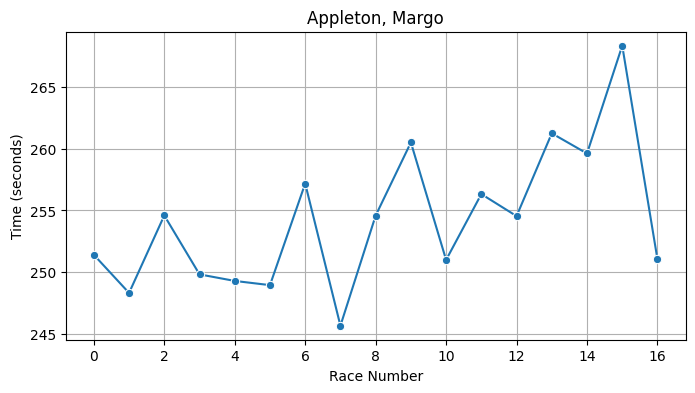

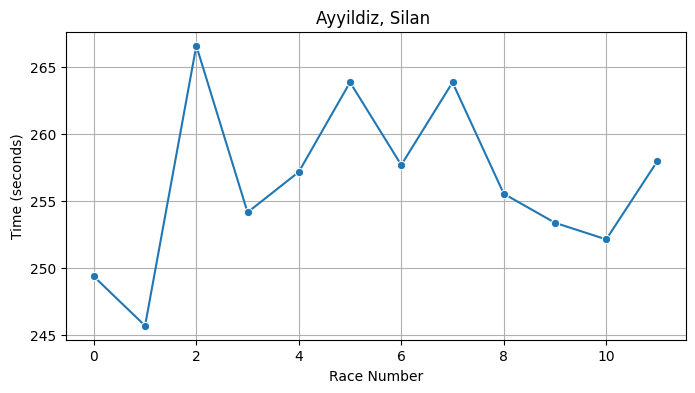

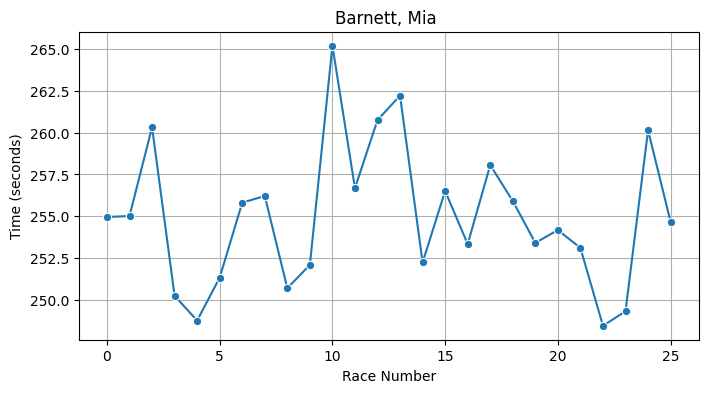

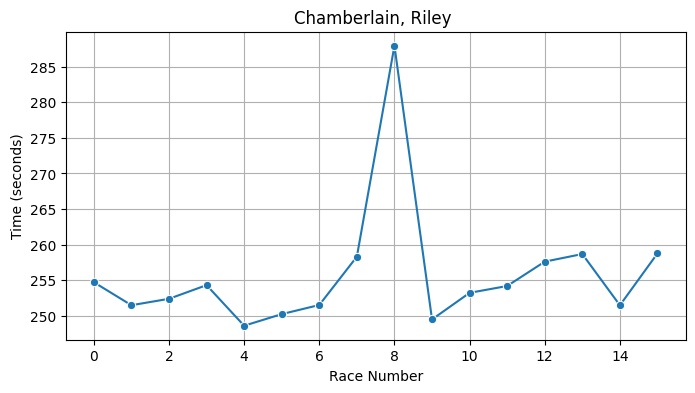

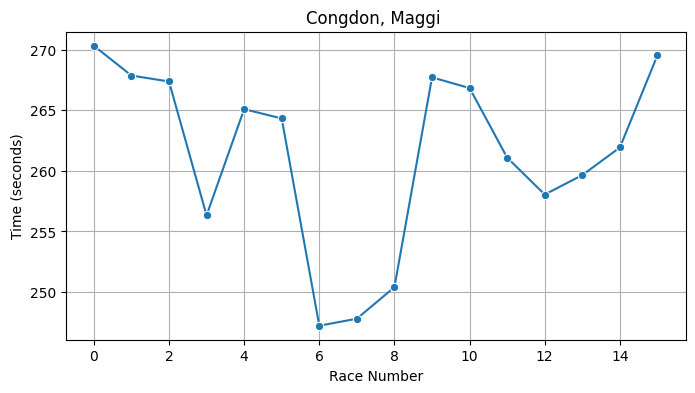

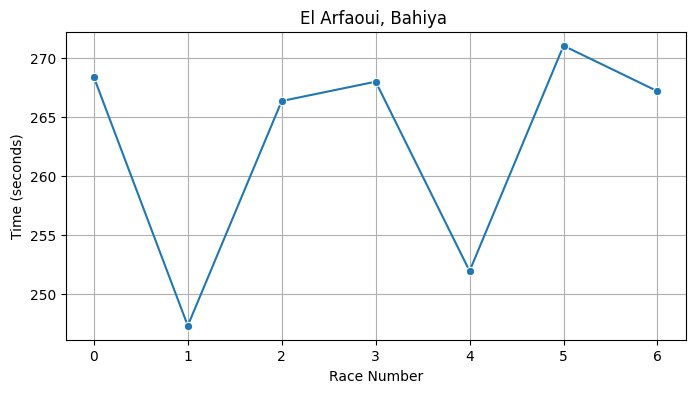

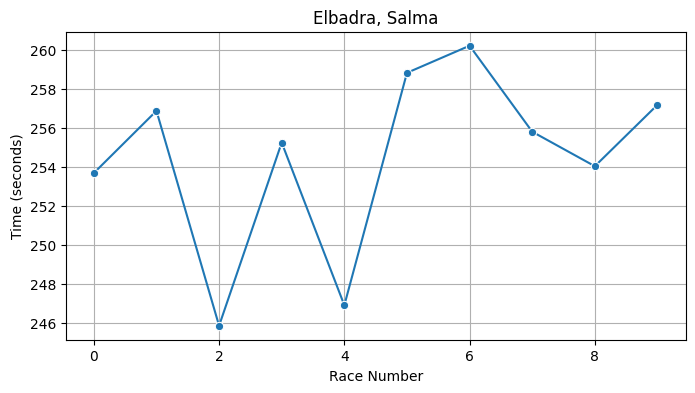

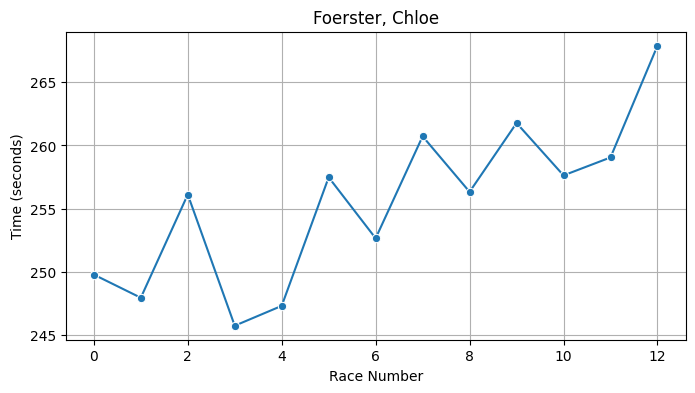

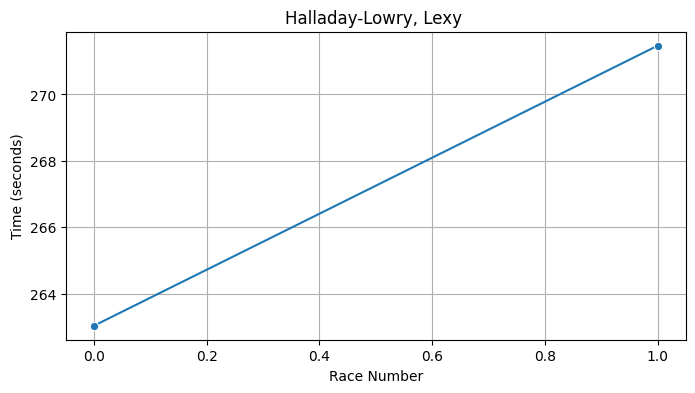

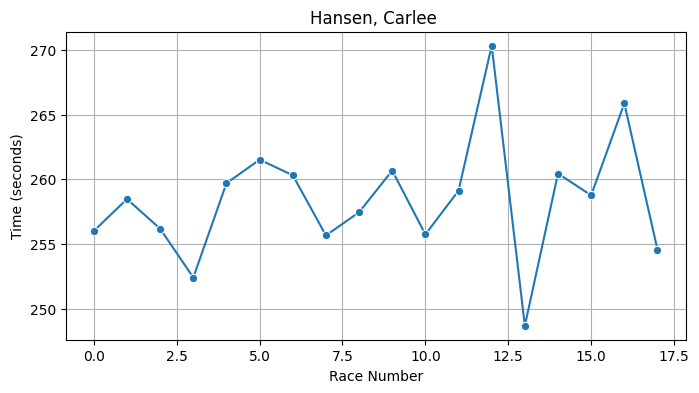

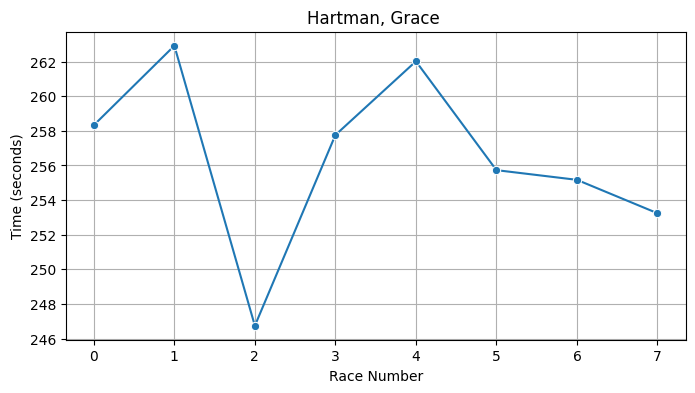

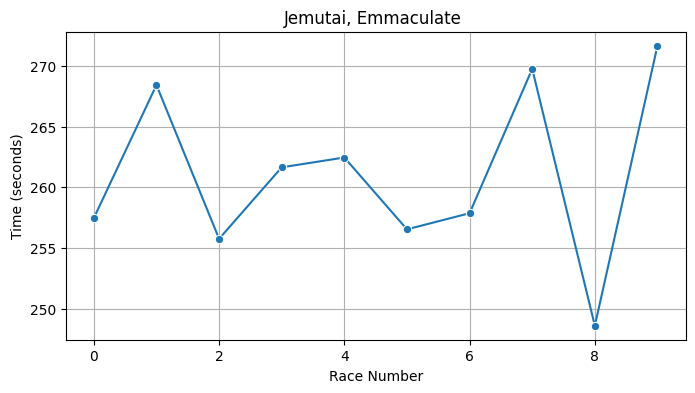

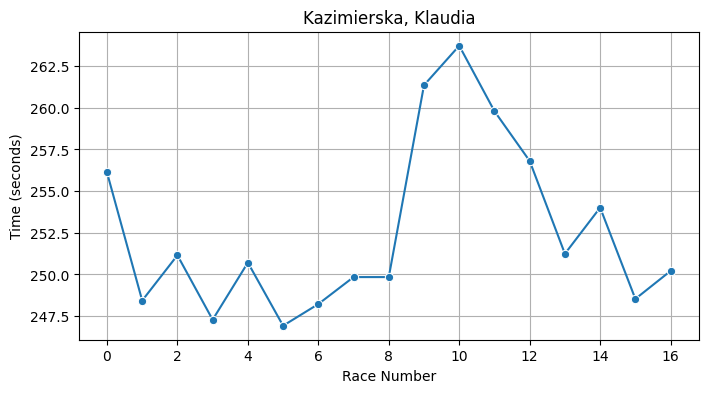

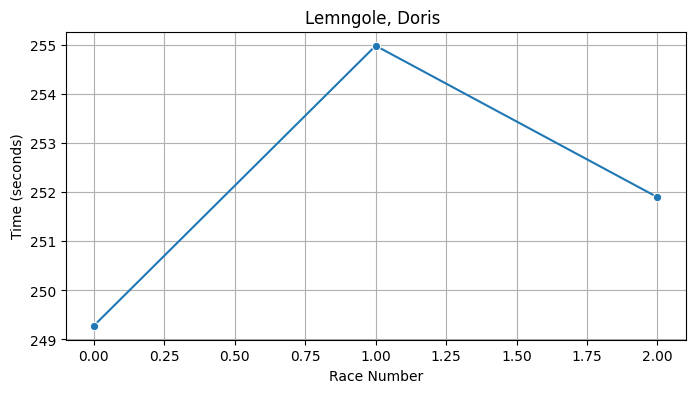

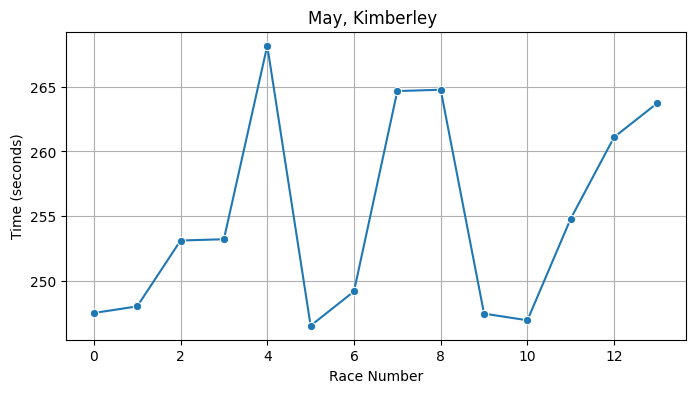

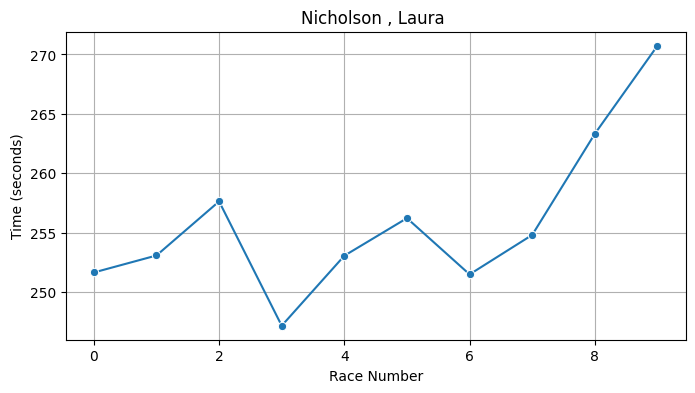

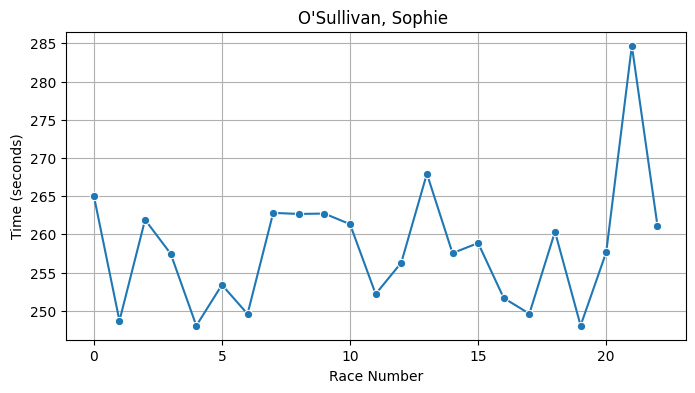

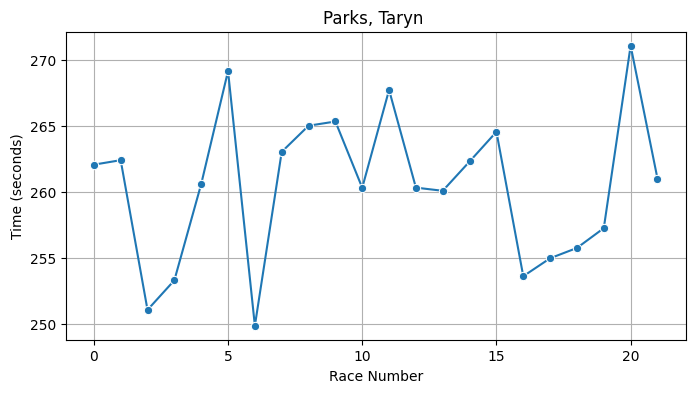

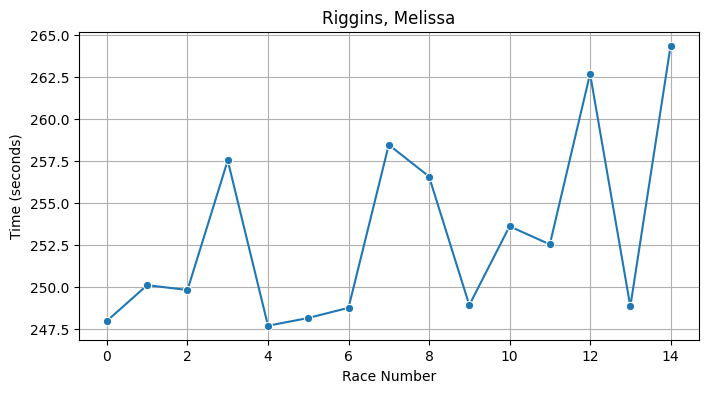

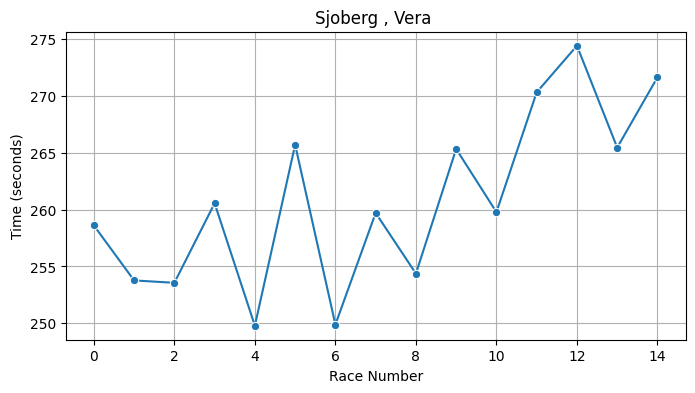

In [8]:
import seaborn as sns

# Rename column
df_clean = df_clean.rename(columns={'Name ': 'Runner'})

# Create Race_Number column
df_clean = df_clean.sort_values(by=['Runner', 'Date'])
df_clean['Race_Number'] = df_clean.groupby('Runner').cumcount()

unique_runners = df_clean['Runner'].unique()

for runner in unique_runners:
    runner_data = df_clean[df_clean['Runner'] == runner]
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=runner_data, x='Race_Number', y='Time_seconds', marker='o')
    plt.title(f"{runner}")
    plt.xlabel("Race Number")
    plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.show()

In [9]:
print(df_clean.columns)

Index(['Runner', 'Event', 'Date', 'Time ', 'Time_seconds', 'Race_Number'], dtype='object')


Fastest time of each runner in order from fastest to slowest

In [11]:
fastest_times = (
    df_clean.groupby('Runner')
    .agg({'Time_seconds': 'min'})
    .reset_index()
)

# Sorting from fastest to slowest
fastest_times_sorted = (
    fastest_times.sort_values(by='Time_seconds', ascending=True)
    .reset_index(drop=True)
)

# Convert seconds to MM:SS.00 format
fastest_times_sorted['Fastest_Time'] = fastest_times_sorted['Time_seconds'].apply(
    lambda x: f"{int(x//60)}:{x%60:05.2f}"
)

# Display
fastest_times_sorted[['Runner', 'Fastest_Time']]

,Runner,Fastest_Time
0,"Ayyildiz, Silan",4:05.66
1,"Appleton, Margo",4:05.68
2,"Foerster, Chloe",4:05.75
3,"Elbadra, Salma",4:05.85
4,"May, Kimberley",4:06.58
5,"Hartman, Grace",4:06.74
6,"Kazimierska, Klaudia",4:06.92
7,"Nicholson , Laura",4:07.17
8,"Congdon, Maggi",4:07.23
9,"El Arfaoui, Bahiya",4:07.31


##Linear regression model
predicting runner times based off their previous race times.


In [29]:


df_clean = df_clean.sort_values(by=['Runner', 'Date'])
df_clean['Race_Number'] = df_clean.groupby('Runner').cumcount()

df_clean['Average_Time'] = df_clean.groupby('Runner')['Time_seconds'].transform('mean')

In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

# Model training
X = df_clean[['Race_Number','Average_Time']]
y = df_clean['Time_seconds']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()

In [59]:


latest_races = df_clean.groupby('Runner').agg({'Race_Number': 'max','Time_seconds':'mean'}).reset_index()
latest_races['Next_Race_Number'] = latest_races['Race_Number'] + 1
latest_races = latest_races.rename(columns={'Time_seconds': 'Average_Time'})

X_next = latest_races[['Next_Race_Number','Average_Time']].rename(columns={'Next_Race_Number': 'Race_Number'})
latest_races['Predicted_Time_Seconds'] = model_lr.predict(X_next)

# Convert to MM:SS.ss format
latest_races['Predicted_Times'] = latest_races['Predicted_Time_Seconds'].apply(
    lambda x: f"{int(x//60)}:{x%60:05.2f}"
)

# Show results
latest_races[['Runner', 'Predicted_Times']]

,Runner,Predicted_Times
0,"Appleton, Margo",4:16.15
1,"Ayyildiz, Silan",4:17.20
2,"Barnett, Mia",4:19.16
3,"Chamberlain, Riley",4:17.54
4,"Congdon, Maggi",4:23.40
5,"El Arfaoui, Bahiya",4:22.80
6,"Elbadra, Salma",4:14.62
7,"Foerster, Chloe",4:16.38
8,"Halladay-Lowry, Lexy",4:26.15
9,"Hansen, Carlee",4:20.83


In [35]:
# Convert MM:SS.ss format to total seconds
def mmss_to_seconds(time_str):
    minutes, seconds = map(float, time_str.split(':'))
    return minutes * 60 + seconds

# Create a new column with total seconds
latest_races['Predicted_Time_Seconds'] = latest_races['Predicted_Times'].apply(mmss_to_seconds)

# Sort from fastest to slowest
sorted_predictions = latest_races.sort_values(by='Predicted_Time_Seconds').reset_index(drop=True)

sorted_predictions

,Runner,Race_Number,Average_Time,Next_Race_Number,Predicted_Time_Seconds,Predicted_Times
0,"Lemngole, Doris",2,252.056667,3,250.33,4:10.33
1,"Riggins, Melissa",14,253.057333,15,254.38,4:14.38
2,"Kazimierska, Klaudia",16,252.600588,17,254.40,4:14.40
3,"Elbadra, Salma",9,254.458000,10,254.62,4:14.62
4,"May, Kimberley",13,254.965714,14,256.15,4:16.15
5,"Appleton, Margo",16,254.257647,17,256.15,4:16.15
6,"Nicholson , Laura",9,255.916000,10,256.16,4:16.16
7,"Hartman, Grace",7,256.488750,8,256.27,4:16.27
8,"Foerster, Chloe",12,255.420000,13,256.38,4:16.38
9,"Ayyildiz, Silan",11,256.430833,12,257.20,4:17.20


In [53]:
sorted_predictions['Average_Time(minutes)'] = sorted_predictions['Average_Time'].apply(
lambda x: f"{int(x//60)}:{x%60:05.2f}")

sorted_predictions

,Runner,Race_Number,Average_Time,Next_Race_Number,Predicted_Time_Seconds,Predicted_Times,Average_Time(minutes)
0,"Lemngole, Doris",2,252.056667,3,250.33,4:10.33,4:12.06
1,"Riggins, Melissa",14,253.057333,15,254.38,4:14.38,4:13.06
2,"Kazimierska, Klaudia",16,252.600588,17,254.40,4:14.40,4:12.60
3,"Elbadra, Salma",9,254.458000,10,254.62,4:14.62,4:14.46
4,"May, Kimberley",13,254.965714,14,256.15,4:16.15,4:14.97
5,"Appleton, Margo",16,254.257647,17,256.15,4:16.15,4:14.26
6,"Nicholson , Laura",9,255.916000,10,256.16,4:16.16,4:15.92
7,"Hartman, Grace",7,256.488750,8,256.27,4:16.27,4:16.49
8,"Foerster, Chloe",12,255.420000,13,256.38,4:16.38,4:15.42
9,"Ayyildiz, Silan",11,256.430833,12,257.20,4:17.20,4:16.43


In [36]:
print(sorted_predictions.columns)

Index(['Runner', 'Race_Number', 'Average_Time', 'Next_Race_Number',
       'Predicted_Time_Seconds', 'Predicted_Times'],
      dtype='object')


## Random forest regression model


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
X = df_clean[['Race_Number','Average_Time']]
y = df_clean['Time_seconds']

df_clean['Average_Time'] = df_clean.groupby('Runner')['Time_seconds'].transform('mean')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_rf=RandomForestRegressor(n_estimators=20,random_state=1)
model_rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=1)

In [46]:
# Get latest race info per runner
latest_races = df_clean.groupby('Runner').agg({
    'Race_Number': 'max',
    'Average_Time': 'first'
}).reset_index()

# Predict next race (Race_Number + 1)
latest_races['Next_Race_Number'] = latest_races['Race_Number'] + 1

# Prepare prediction input
X_next = latest_races[['Next_Race_Number','Average_Time']].rename(columns={'Next_Race_Number': 'Race_Number'})

# Predict
latest_races['Predicted_Time_Seconds'] = model_rf.predict(X_next)

# Convert to MM:SS.ss
latest_races['Predicted_Time_MMSS'] = latest_races['Predicted_Time_Seconds'].apply(
    lambda x: f"{int(x//60)}:{x%60:05.2f}"
)

# Display predictions
latest_races[['Runner', 'Predicted_Time_MMSS']]


,Runner,Predicted_Time_MMSS
0,"Appleton, Margo",4:12.47
1,"Ayyildiz, Silan",4:19.65
2,"Barnett, Mia",4:15.45
3,"Chamberlain, Riley",4:16.02
4,"Congdon, Maggi",4:19.39
5,"El Arfaoui, Bahiya",4:18.43
6,"Elbadra, Salma",4:14.59
7,"Foerster, Chloe",4:21.68
8,"Halladay-Lowry, Lexy",4:23.48
9,"Hansen, Carlee",4:19.12


In [47]:
latest_races

,Runner,Race_Number,Average_Time,Next_Race_Number,Predicted_Time_Seconds,Predicted_Time_MMSS
0,"Appleton, Margo",16,254.257647,17,252.4730,4:12.47
1,"Ayyildiz, Silan",11,256.430833,12,259.6490,4:19.65
2,"Barnett, Mia",25,254.981154,26,255.4535,4:15.45
3,"Chamberlain, Riley",15,255.811250,16,256.0165,4:16.02
4,"Congdon, Maggi",15,261.346250,16,259.3855,4:19.39
5,"El Arfaoui, Bahiya",6,262.900000,7,258.4275,4:18.43
6,"Elbadra, Salma",9,254.458000,10,254.5925,4:14.59
7,"Foerster, Chloe",12,255.420000,13,261.6800,4:21.68
8,"Halladay-Lowry, Lexy",1,267.250000,2,263.4765,4:23.48
9,"Hansen, Carlee",17,258.446111,18,259.1245,4:19.12


In [55]:
latest_races['Average_Time(minutes)'] = latest_races['Average_Time'].apply(
lambda x: f"{int(x//60)}:{x%60:05.2f}")

latest_races

,Runner,Race_Number,Average_Time,Next_Race_Number,Predicted_Time_MMSS,Average_Time(minutes)
0,"Appleton, Margo",16,254.257647,17,4:12.47,4:14.26
1,"Ayyildiz, Silan",11,256.430833,12,4:19.65,4:16.43
2,"Barnett, Mia",25,254.981154,26,4:15.45,4:14.98
3,"Chamberlain, Riley",15,255.811250,16,4:16.02,4:15.81
4,"Congdon, Maggi",15,261.346250,16,4:19.39,4:21.35
5,"El Arfaoui, Bahiya",6,262.900000,7,4:18.43,4:22.90
6,"Elbadra, Salma",9,254.458000,10,4:14.59,4:14.46
7,"Foerster, Chloe",12,255.420000,13,4:21.68,4:15.42
8,"Halladay-Lowry, Lexy",1,267.250000,2,4:23.48,4:27.25
9,"Hansen, Carlee",17,258.446111,18,4:19.12,4:18.45


Mean absolute percentage error

In [58]:
from sklearn.metrics import mean_absolute_error


y_test_pred_lr = model_lr.predict(X_test)

# Calculate MAE and MAPE
mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_test_pred_lr) / y_test)) * 100

print("Linear Regression:")
print(f"  MAE: {mae_lr:.2f} seconds")
print(f"  MAPE: {mape_lr:.2f}%")


from sklearn.metrics import mean_absolute_error

# Predict on the test set
y_test_pred_rf = model_rf.predict(X_test)

# Calculate MAE and MAPE
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_test_pred_rf) / y_test)) * 100

print("\nRandom Forest Regressor:")
print(f"  MAE: {mae_rf:.2f} seconds")
print(f"  MAPE: {mape_rf:.2f}%")


Linear Regression:
  MAE: 4.62 seconds
  MAPE: 1.78%

Random Forest Regressor:
  MAE: 5.81 seconds
  MAPE: 2.24%


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Assume you've built your dataset
X = df_clean[['Race_Number', 'Average_Time']]
y = df_clean['Time_seconds']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# R² score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.018674331375746478


The Mean Absolute Percentage Error shows that the Linear Regression model is more accurate for predicting runner's times. 4.62 seconds off from the actual value.

In [60]:
import pickle
with open('model_lr_with_avg.pkl', 'wb') as f:
    pickle.dump(model_lr, f)